In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

wine = pd.read_csv('winequality-red.csv')

In [13]:
g = sns.PairGrid(wine)
g.map(sns.scatterplot)

In [14]:
#if the wine has a quality higher than 6 then it is considered good
wine['quality'] = pd.cut(wine['quality'], bins = [0, 6.5, float('Inf')], labels = [float(1), float(0)])

In [15]:
quality = wine['quality']
volatile_acidity = wine['volatile acidity']
plt.scatter(volatile_acidity, quality)


c:\Users\Zac\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


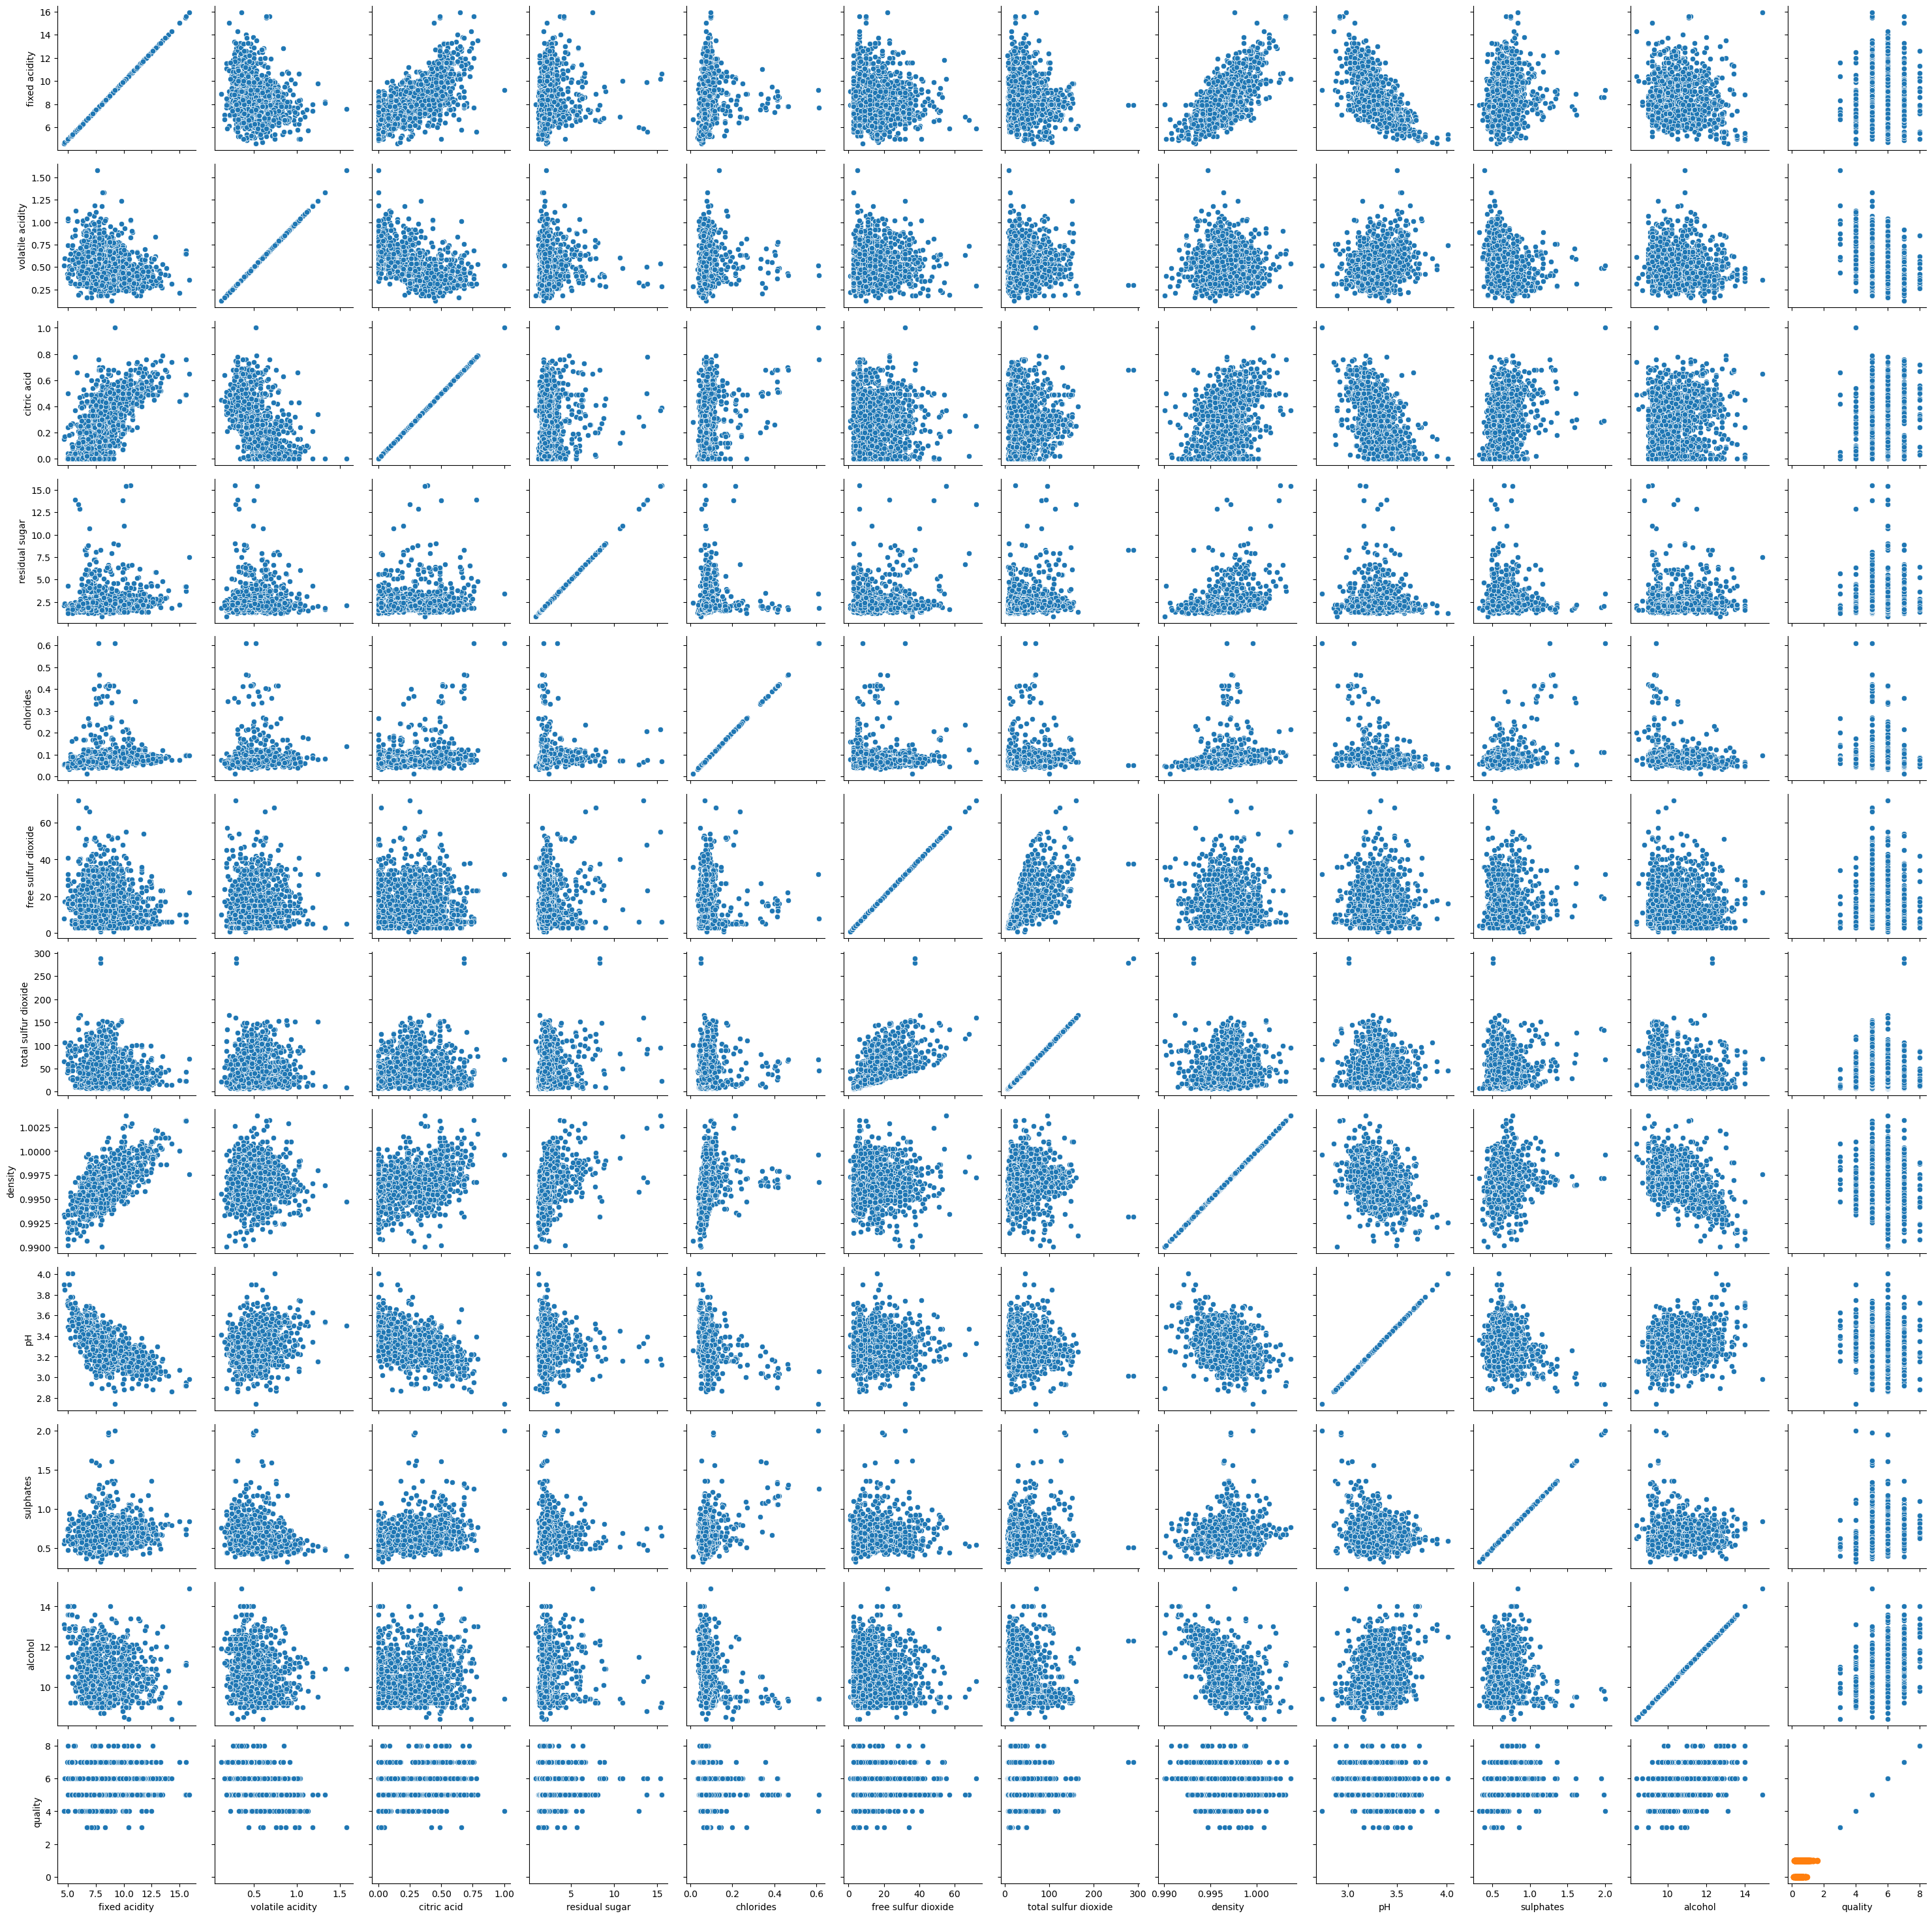

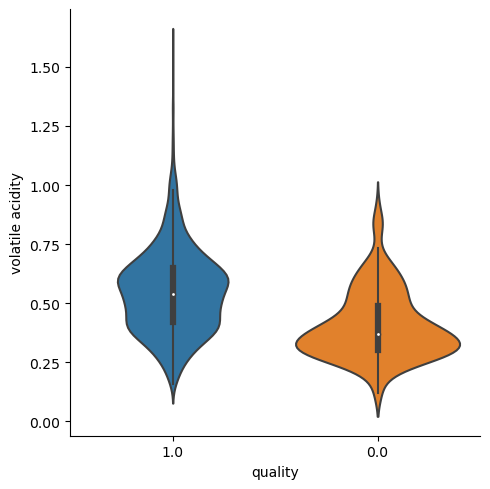

In [16]:
sns.catplot(x = "quality", y = "volatile acidity",
            kind = "violin", data = wine)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

X = wine[features]
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #create train and testing data using all features of dataset


In [19]:
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))
#print('Predicted labels: ', pred) Exceeds max iterations so removing
print('Accuracy: ', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.69      0.26      0.37        43
         1.0       0.89      0.98      0.94       277

    accuracy                           0.88       320
   macro avg       0.79      0.62      0.65       320
weighted avg       0.87      0.88      0.86       320

Accuracy:  0.884375


c:\Users\Zac\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
#use confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[ 11,  32],
       [  5, 272]], dtype=int64)

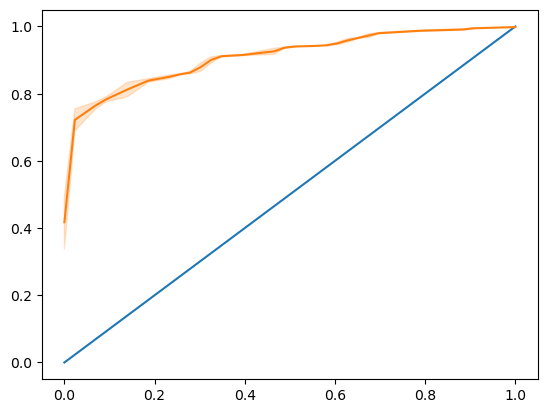

In [21]:
# visualise ROC curve (Receiving Operating Characteristic)
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

sns.lineplot(x = [0, 1], y = [0, 1])
sns.lineplot(x = fpr, y = tpr)
plt.show()

In [10]:
#Area Under the Curve (AUC)
auc = roc_auc_score(y_test, y_scores[:, 1])
print(auc)

0.8555357142857143
